<a href="https://colab.research.google.com/github/cwpenland/Project-Sunroof/blob/master/Project_Sunroof_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Introduction**

Definition: A solar panel is a collection of photovoltaic cells which can absorb the sun's rays and convert them into electricity or heat. Many regard them to be an effective and cheaper alternative to traditional energy sources, and champion the fact that harnessing solar power creates less carbon dioxide emissions.

Google's Project Sunroof harnesses the power of its database of imagery and maps to determine the solar panel capacity for every existing rooftop in the United States, taking into account 3D modeling of the roof, shadows cast by nearby structures, varying sun positions and historical weather data. It then estimates the potential solar energy output and CO2 emission reduction, aggregated by state, region and city.

This analysis explores the relationship between states' population and solar panel potential.  

# **Import Data**

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

import pandas as pd
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

sunroof = pd.read_csv('/content/gdrive/My Drive/Colab Datasets/sunroof_state.csv')
ten_yr_growth = pd.read_csv('/content/gdrive/My Drive/Colab Datasets/census_pop_change.csv')
consumed = pd.read_csv('/content/gdrive/My Drive/Colab Datasets/energy_consumed.csv')
cost = pd.read_csv('/content/gdrive/My Drive/Colab Datasets/energy_cost.csv')
co2 = pd.read_csv('/content/gdrive/My Drive/Colab Datasets/CO2_emissions.csv')
sunroof_city = pd.read_csv('/content/gdrive/My Drive/Colab Datasets/sunroof_city.csv')
electricity_cost = pd.read_csv('/content/gdrive/My Drive/Colab Datasets/electricity_cost.csv')

solar_df = pd.merge(pd.merge(pd.merge(pd.merge(pd.merge(sunroof, ten_yr_growth,on='State'),consumed, on='State'), cost, on='State'), co2, on='State'), electricity_cost, on='State')

solar_df.head()

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


,region_name,State,count_qualified,percent_covered,percent_qualified,number_of_panels_median,number_of_panels_total,kw_median,kw_total,yearly_sunlight_kwh_median,yearly_sunlight_kwh_total,carbon_offset_metric_tons,existing_installs_count,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,10_yr_growth,Rank_x,State.1_x,Energy_Consumed,Rank_y,State.1_y,Cost_Per_Capita,Rank,Abbrev,CO2_Emissions,cents/kwh
0,Alabama,Alabama,700683,74.381423,78.455420,39,58997532,9.75,14749383.0,12069.322660,1.896138e+10,1.202295e+07,549,4785437,4799069,4815588,4830081,4841799,4852347,4863525,4874486,4887681,4903185,2.46,14,AL,400,15,AL,4491,15,AL,108,12.66
1,Alaska,Alaska,27583,50.685736,37.150323,29,2179124,7.25,544781.0,6540.612622,4.664927e+08,1.921975e+05,83,713910,722128,730443,737068,736283,737498,741456,739700,735139,731545,2.47,4,AK,830,3,AK,8060,40,AK,34,23.17
2,Arizona,Arizona,1638999,82.343259,91.615986,47,114697808,11.75,28674452.0,18974.796640,4.639329e+10,1.991384e+07,39553,6407172,6472643,6554978,6632764,6730413,6829676,6941072,7044008,7158024,7278717,13.60,46,AZ,208,48,AZ,3189,24,AZ,86,12.99
3,Arkansas,Arkansas,322235,63.187435,75.680036,39,28130196,9.75,7032549.0,12099.947970,8.941609e+09,5.619081e+06,238,2921964,2940667,2952164,2959400,2967392,2978048,2989918,3001345,3009733,3017804,3.28,17,AR,372,21,AR,4156,29,AR,64,10.48
4,California,California,7841387,87.964252,87.051870,39,531022657,9.75,132755664.3,14460.077980,1.980000e+11,5.449561e+07,328899,37319502,37638369,37948800,38260787,38596972,38918045,39167117,39358497,39461588,39512223,5.88,48,CA,202,38,CA,3522,2,CA,359,18.69


# **Exploring Project Sunroof**

**Percentage of buildings that are suitable for solar:**

Project Sunroof determines for each state a count of building rooftops that are suitable for solar panel installation.  We can view this as a percentage for each state.

Text(0.5, 0, 'Percentage of Qualified Rooftops')

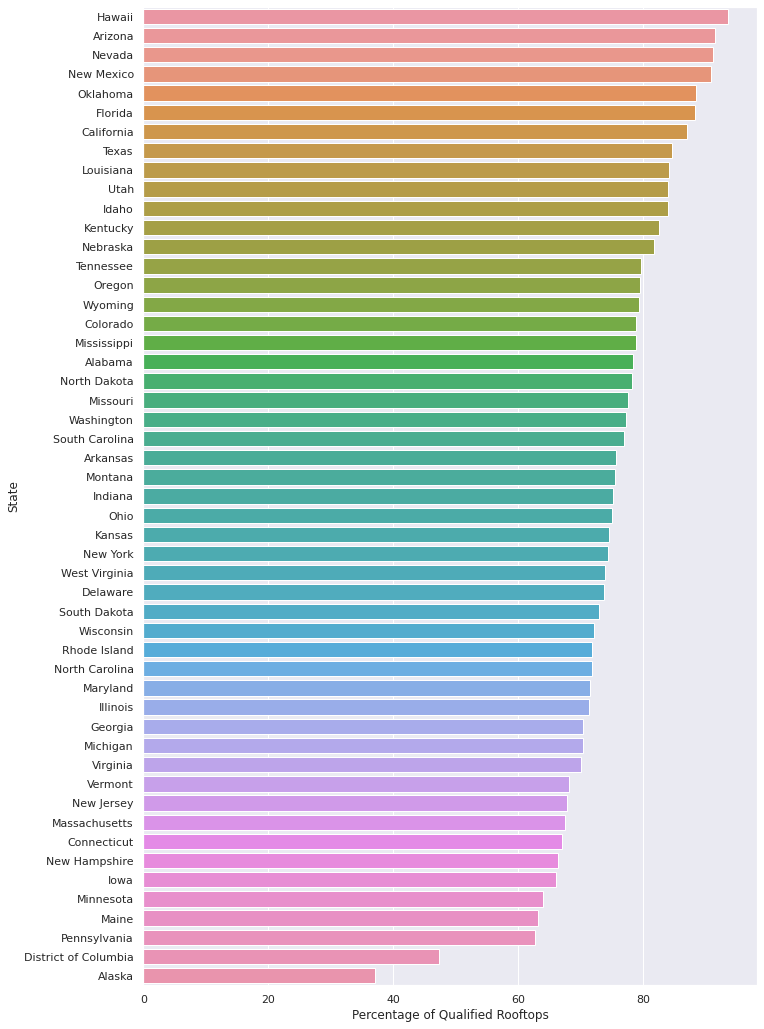

In [ ]:
percent_qual_order = sunroof.sort_values('percent_qualified', ascending=False)

plt.figure(figsize=(11,18))

ax = sns.barplot(y='State', x='percent_qualified', data=percent_qual_order)
plt.xlabel('Percentage of Qualified Rooftops')

Every state except Alaska and District of Columbia has more than 60% of its buildings qualified for solar panels.  This is good news, because 60% is a majority and that means almost every state stands to see meaningful impacts from the implementation of solar panels.

**Number of buildings that are suitable for solar:**

Now let's examine the actual *number* of buildings qualified for solar.  A high percentage doesnt necessarily yield the greatest capacity for solar panels.  We see Hawaii tops the percentage rankings, but given it's size, it's unlikely to have the highest number of buildings.



Text(0.5, 0, 'Number of Qualified Rooftops')

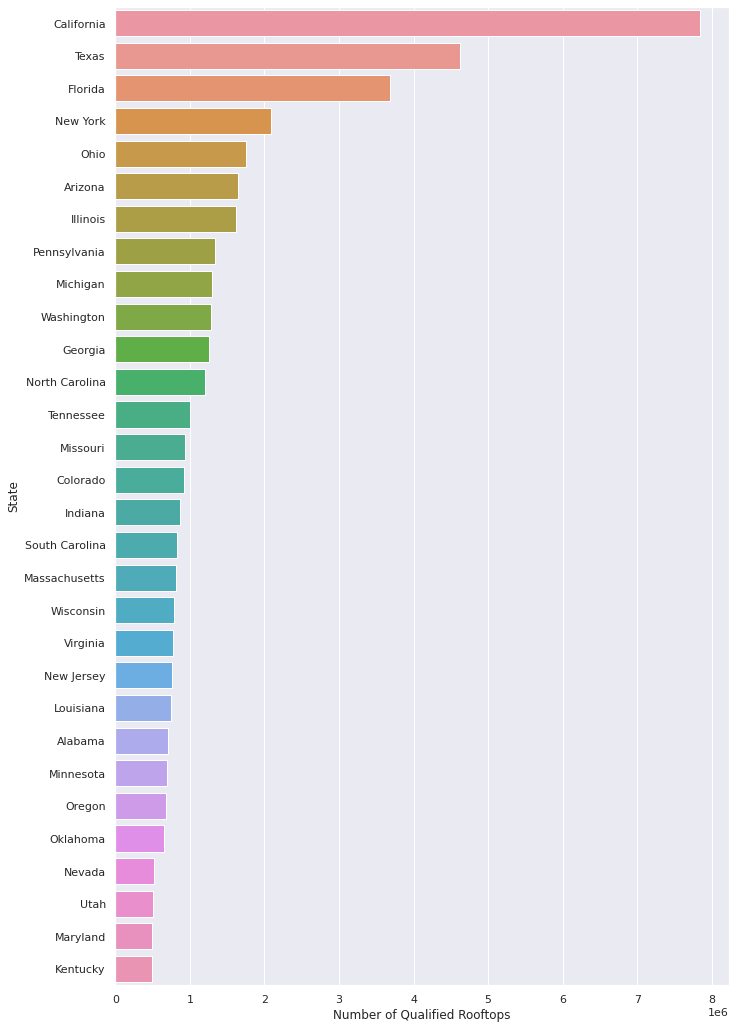

In [ ]:
count_qual_order = sunroof.sort_values('count_qualified', ascending=False)
count_qual_top30 = count_qual_order.head(30)

plt.figure(figsize=(11,18))
ax = sns.barplot(y='State', x='count_qualified', data=count_qual_top30)
plt.xlabel('Number of Qualified Rooftops')

**Correlation between total number of panels and number of qualified rooftops:**

It's worth noting here that while we could have looked at the actual total number of panels possible to install in each state, there is a very strong correlation between total number panels and count of qualified builings.  It is safe to say that the more qualified rooftops a state has, the greater the capacity for solar panel installations.

Text(0, 0.5, 'Total Number of Panels')

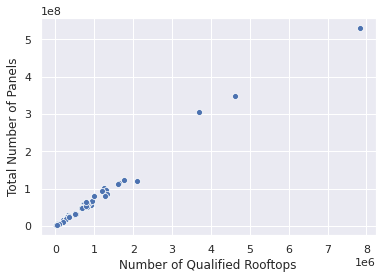

In [ ]:
ax = sns.scatterplot(y='number_of_panels_total', x='count_qualified', data=solar_df)
plt.xlabel('Number of Qualified Rooftops')
plt.ylabel('Total Number of Panels')

The other two metrics we want to look at is the total solar energy potential for each state (in killowatt-hours) and the total carbon dioxide emission abatement (in metric tons)

**Total solar energy potential:**

Text(0.5, 0, 'Yearly kWh Total')

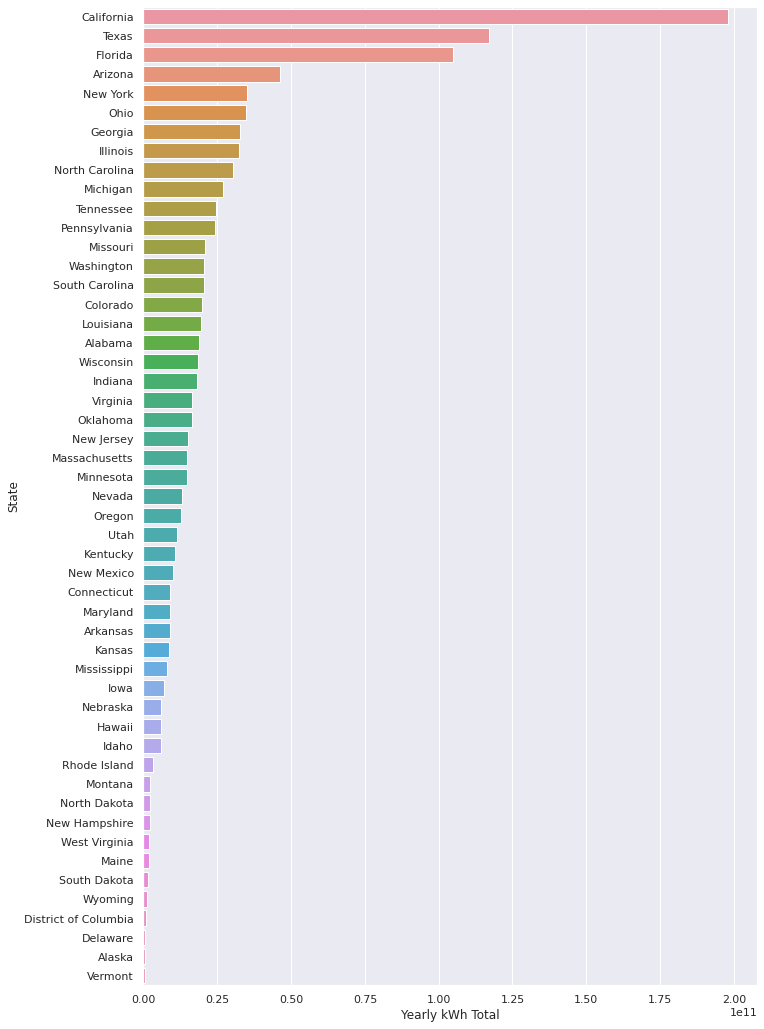

In [ ]:
yearly_kwh_total = sunroof.sort_values('yearly_sunlight_kwh_total', ascending=False)
yearly_kwh_total
plt.figure(figsize=(11,18))
ax = sns.barplot(y='State', x='yearly_sunlight_kwh_total', data=yearly_kwh_total)
plt.xlabel('Yearly kWh Total')

**Total carbon dioxide abatement potential:**

Text(0.5, 0, 'CO2 abatement (metric tons)')

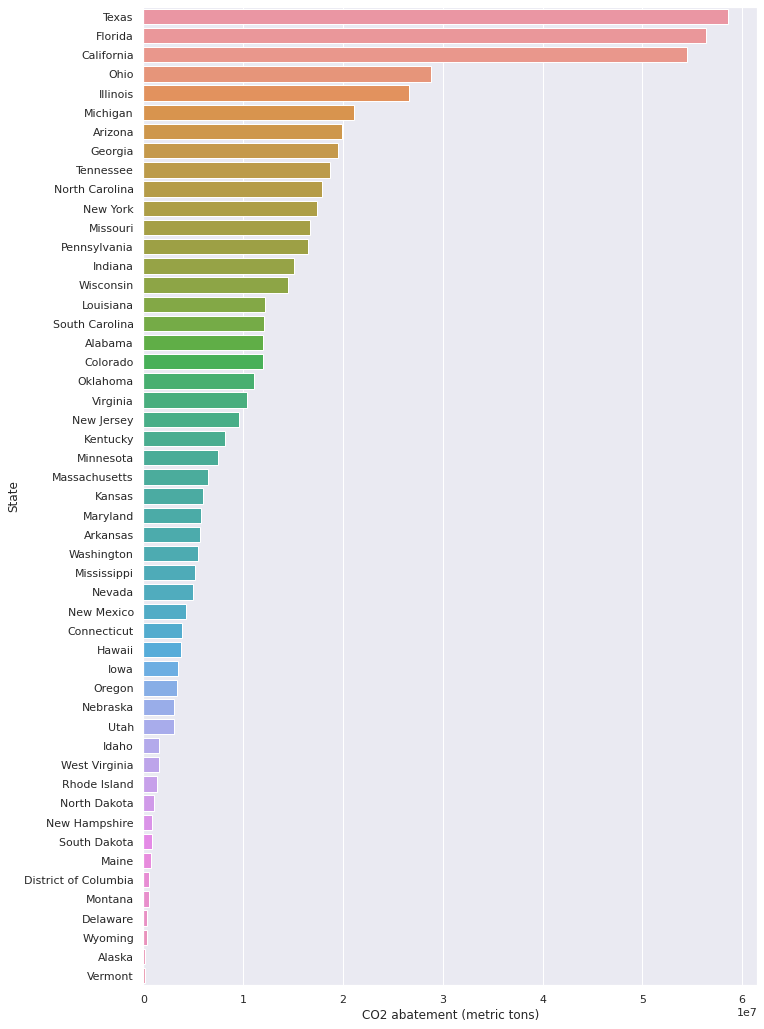

In [ ]:
co2_emissions = sunroof.sort_values('carbon_offset_metric_tons', ascending=False)
plt.figure(figsize=(11,18))
ax = sns.barplot(y='State', x='carbon_offset_metric_tons', data=co2_emissions)
plt.xlabel('CO2 abatement (metric tons)')

**Trends:**

There are some sensible trends emerging here.  The states with the greatest number of qualified rooftops also have the greatest potential for solar energy generation, as well as carbon dioxide abatement.  This stands to reason as you'd expect more rooftops = more panels = more solar energy = less CO2.

The statistical relationship below verifies these assumptions.

,count_qualified,yearly_sunlight_kwh_total,carbon_offset_metric_tons
count_qualified,1.000000,0.991590,0.903939
yearly_sunlight_kwh_total,0.991590,1.000000,0.908287
carbon_offset_metric_tons,0.903939,0.908287,1.000000


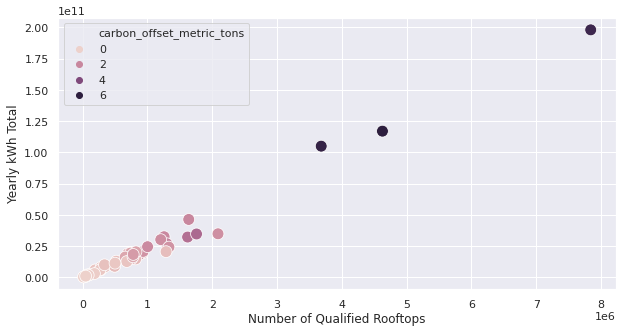

In [ ]:
plt.figure(figsize = (10,5))
ax = sns.scatterplot(y='yearly_sunlight_kwh_total', x='count_qualified',hue ='carbon_offset_metric_tons', s=140, data=solar_df)
plt.xlabel('Number of Qualified Rooftops')
plt.ylabel('Yearly kWh Total')
solar_df[['count_qualified','yearly_sunlight_kwh_total','carbon_offset_metric_tons']].corr()

# **Population Impact**



This section explores the relationship between a state's population and the metrics we examined earlier from Project Sunroof.  

This is significant because while Google may not regularly update its Project Sunroof data, the U.S. Census Bureau will certainly continue to collect population data.  If there is a link between population and solar energy potential, the findings could be valuable for state/city governments, the solar panel industry, and environmental groups.  Targeting populous areas with the knowledge that they stand to see the greatest impact would be beneficial to a myriad of causes.

**2019 Population vs Yearly kWh Total**

The hypothesis is that as population increases, so will the solar kWh potential of a state. 



Text(0, 0.5, 'Yearly kWh Total')

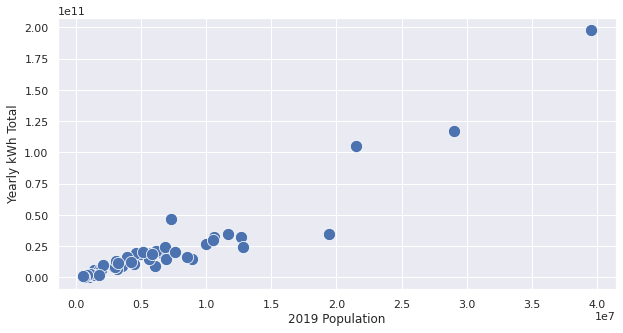

In [ ]:
plt.figure(figsize = (10,5))
ax = sns.scatterplot(y='yearly_sunlight_kwh_total', x='2019', data=solar_df, s=150)
plt.xlabel('2019 Population')
plt.ylabel('Yearly kWh Total')

In [ ]:
stats.pearsonr(solar_df['2019'], solar_df['yearly_sunlight_kwh_total'])

(0.9432548937610988, 4.160767785009323e-25)

There is a strong correlation between the 2019 population and yearly kWh potential.  While most of the states are clustered together at the low end of the yearly kWh spectrum, the statistics suggest that as state populations increaes, so will their solar energy potential.

**Population Growth Rate vs Yearly kWh Total**

This data captures the growth of states between 2010 and 2019.  A quick visual check of the graph below shows the same correlation does not exist with states' growth rates.

Text(0, 0.5, 'Yearly kWh Total')

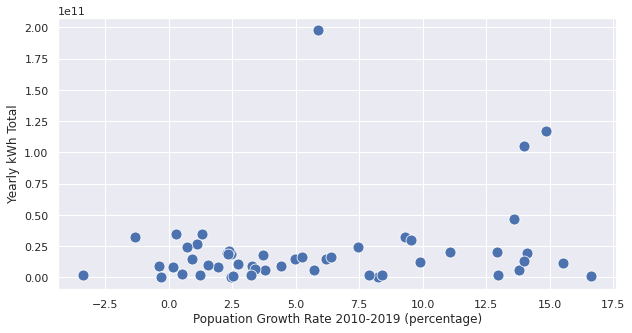

In [ ]:
plt.figure(figsize = (10,5))
ax = sns.scatterplot(y='yearly_sunlight_kwh_total', x='10_yr_growth',data=solar_df, s=120)
plt.xlabel('Popuation Growth Rate 2010-2019 (percentage)')
plt.ylabel('Yearly kWh Total')

**2019 Population vs Carbon Dioxide Abatement**

The reduction of C02 emissions has a similar relationship with population as does the yearly kWh total.  This is important for solar panel proponents, as reducuing the amount of carbon dioxide emitted into the air is generally a strong selling point for installations.

Text(0, 0.5, 'CO2 Emission Reduction')

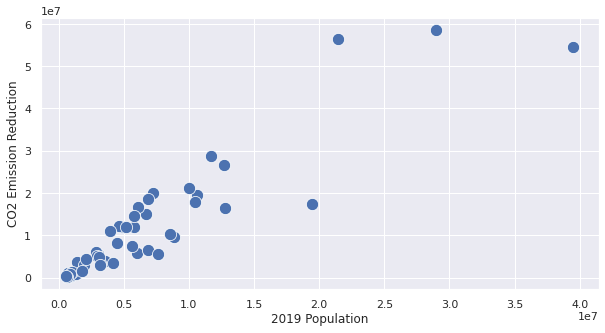

In [ ]:
plt.figure(figsize = (10,5))
ax = sns.scatterplot(y='carbon_offset_metric_tons', x='2019', data=solar_df, s=150)
plt.xlabel('2019 Population')
plt.ylabel('CO2 Emission Reduction')

In [ ]:
stats.pearsonr(solar_df['2019'], solar_df['carbon_offset_metric_tons'])

(0.9159377870618755, 4.5941427045836154e-21)

# **Energy Expenditures**



This section uses data from the U.S. Energy Information Administration to examine some changes each state would see if the solar panel potential outlined in Project Sunroof were fully implemented.

### **States' Potential Carbon Offset Ranked by CO2 Emissions**  

The chart below ranks states from top to bottom in order of current CO2 Emissions and graphs their potential CO2 Abatement from installing solar panels.

Immediately we can see that the states producing the most CO2 also have the highest potential CO2 abatement. This is an important relationship; the states who can reduce their carbon footprint arguably have a need to do so. Reducing CO2 emissions would not be nearly as interesting if the states with the highest potential abatement were also already the lowest ranked in current CO2 Emissions.

Text(0, 0.5, 'States Ranked by CO2 Emissions')

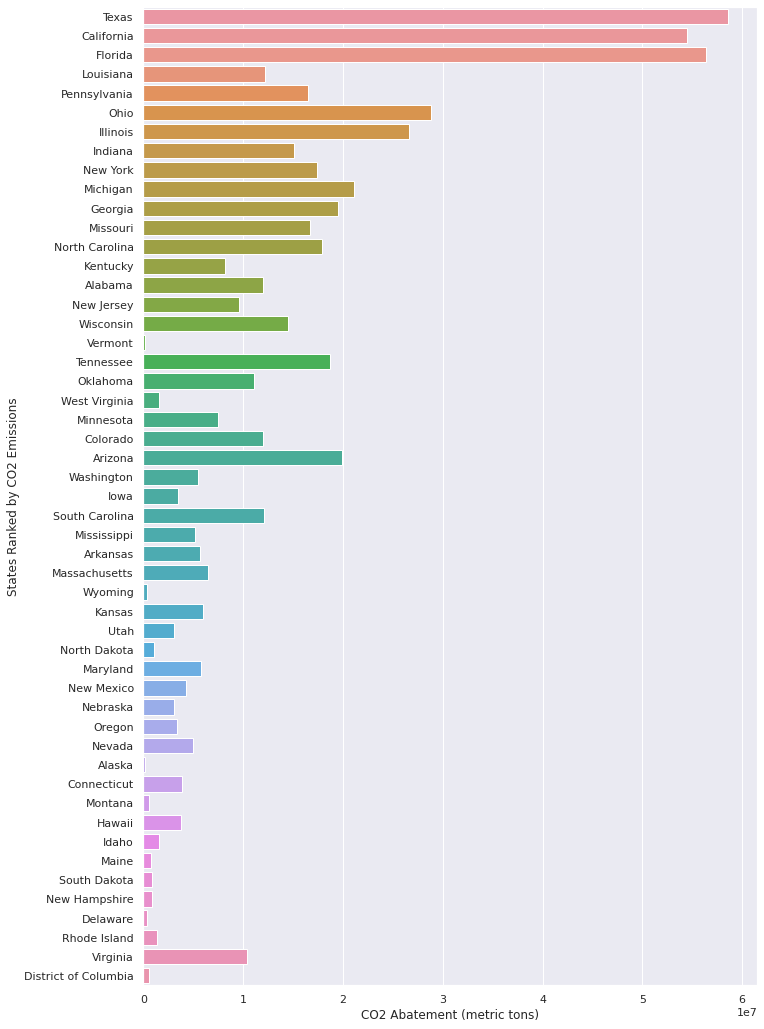

In [ ]:
co2_emissions = solar_df.sort_values('CO2_Emissions', ascending=False)

plt.figure(figsize=(11,18))
ax = sns.barplot(y='State', x='carbon_offset_metric_tons', data=co2_emissions)
plt.xlabel('CO2 Abatement (metric tons)')
plt.ylabel('States Ranked by CO2 Emissions')

In [ ]:
stats.pearsonr(solar_df['carbon_offset_metric_tons'], solar_df['CO2_Emissions'])

(0.8482924615100809, 3.920834630430986e-15)

### **CO2 Emissions Before and After Project Sunroof Implementation**


The table below compares a state's current CO2 Emissions with its potential CO2 abatement in million metric tons.  

Several states such as Florida, Arizona, and Disctrict of Columbia see a carbon dixodie reduction of over 20%.  Many see a reduction greater than 10%.

In [ ]:
carbon_df = pd.DataFrame()
carbon_df[['State','CO2_Emissions']] = solar_df[['State','CO2_Emissions']]

carbon_offset_million_metric_tons = solar_df['carbon_offset_metric_tons']/1000000
carbon_df['CO2_Offset'] = carbon_offset_million_metric_tons

percent_change = (carbon_df['CO2_Offset']/carbon_df['CO2_Emissions'])*100
carbon_df['percent_change'] = percent_change

carbon_df.sort_values('CO2_Emissions', ascending=False)


,State,CO2_Emissions,CO2_Offset,percent_change
43,Texas,707,58.575403,8.285064
4,California,359,54.495607,15.179835
9,Florida,227,56.405464,24.848222
18,Louisiana,226,12.154429,5.378066
38,Pennsylvania,215,16.461800,7.656651
35,Ohio,204,28.793442,14.114432
13,Illinois,201,26.624992,13.246265
14,Indiana,176,15.110088,8.585277
32,New York,157,17.354740,11.053975
22,Michigan,152,21.137446,13.906214


### **States' Energy Consumption**

The chart below ranks states from top to bottom in term of energy consumption and graphs their 2019 population.

Here we see that the least populous states actually consume the most energy.  With the exception of Texas, the most populous are at the very bottom of the energy consumption rankings.  This is a bit counterintuituve, as one might assume that since people consume energy, where there are more people there would be greater energy usage.  Instead, we must assume that there are other factors at play here, perhaps industrial or manufacturing processes.



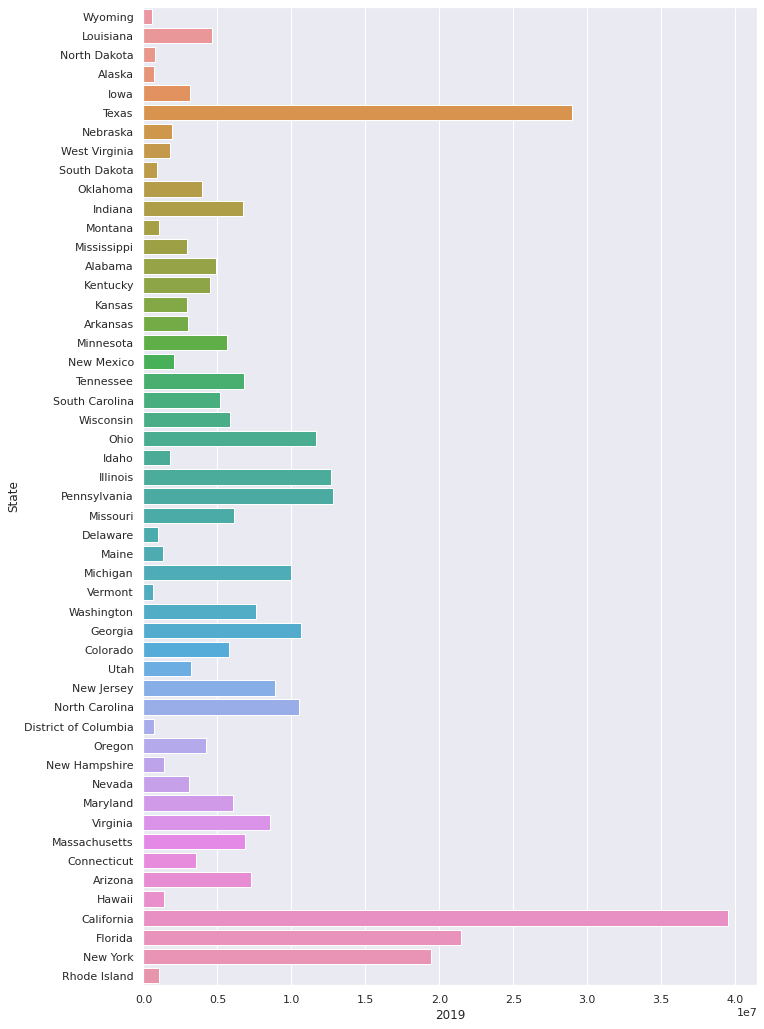

In [ ]:
expenditures = solar_df.sort_values('Energy_Consumed', ascending=False)

plt.figure(figsize=(11,18))
ax = sns.barplot(y='State', x='2019', data=expenditures)

In [ ]:
stats.pearsonr(solar_df['2019'], solar_df['Energy_Consumed'])

(-0.2439191009308817, 0.08454435735229322)

### **Energy Usage Before and After Project Sunroof Implementation**

The table below comapres a state's current energy usage with the potential energy generated by solar panels in btu per capita.  While there are costs associated with conversion of solar energy, we will consider these negligible in this instance and view the solar energy as "free" energy.

First we must convert Project Sunroof's kWh into BTU per capita for comparison.

The percent change can be thought of as the percentage of energy consumed that the sun could provide for "free".

The before and after for energy usage is not nearly as striking as it was for CO2 Emissions.  Only Arizona see a 10% change, and most states fall under 5%.

In [ ]:
energy_df = pd.DataFrame()
energy_df[['State','Energy_Consumed']] = solar_df[['State','Energy_Consumed']]


solar_kwh_per_capita = solar_df['yearly_sunlight_kwh_total']/solar_df['2019']
solar_btu_per_capita = (solar_kwh_per_capita*3412.14)/1000000
energy_df['Solar_Offset'] = solar_btu_per_capita

percent_change = (energy_df['Solar_Offset']/energy_df['Energy_Consumed'])*100
energy_df['percent_change']=percent_change

energy_df.sort_values('Energy_Consumed', ascending=False)

,State,Energy_Consumed,Solar_Offset,percent_change
50,Wyoming,967,6.535969,0.675902
18,Louisiana,945,14.323600,1.515725
34,North Dakota,872,9.264128,1.062400
1,Alaska,830,2.175858,0.262152
15,Iowa,513,7.421954,1.446775
43,Texas,498,13.768176,2.764694
27,Nebraska,475,10.763312,2.265960
48,West Virginia,462,3.536912,0.765565
41,South Dakota,452,6.209831,1.373856
36,Oklahoma,433,14.066219,3.248550


### **Energy Cost**

The EIA gives an average electricty cost for each state in cents/kWh, which we can use in conjunction with the yearly kWh potential to see how much money each state could save using Project Sunroof's solar panels.

The EIA also has data on each states energy cost as USD per capita.  We can use the population data from the U.S. Census Bureau to calculate what each states total energy expenses were for the year. 

With these two calculations, we can see what percentage of energy expenses the solar panels could potentially save each state.  This is valuable to any proponent of solar energy, as what better way to advocate implementing your product than to show how much money it saves.

In [ ]:
cost_df = pd.DataFrame()
cost_df[['State','cents/kwh']] = solar_df[['State','cents/kwh']]

cost_df['Savings_(USD)'] = (cost_df['cents/kwh'] * solar_df['yearly_sunlight_kwh_total'])/100
cost_df['Energy_Expenses_(USD)'] = solar_df['Cost_Per_Capita'] * solar_df['2019']
cost_df['percent_saved'] = (cost_df['Savings_(USD)']/cost_df['Energy_Expenses_(USD)'])*100

cost_df.sort_values('percent_saved', ascending=False)


,State,cents/kwh,Savings_(USD),Energy_Expenses_(USD),percent_saved
11,Hawaii,30.94,1.857752e+09,6595131776,28.168533
4,California,18.69,3.700620e+10,139162049406,26.592164
2,Arizona,12.99,6.026488e+09,23211828513,25.963005
39,Rhode Island,21.20,6.577256e+08,3904804646,16.844008
9,Florida,9.83,1.032150e+10,63166024517,16.340272
6,Connecticut,23.96,2.158085e+09,14118536520,15.285473
31,New Mexico,12.24,1.239477e+09,8290861866,14.949915
28,Nevada,11.42,1.487282e+09,10527973208,14.126952
5,Colorado,12.06,2.376734e+09,18652545904,12.742143
40,South Carolina,12.75,2.613381e+09,20610302142,12.679976


While there is not a strong correlation between a state's total energy expense and the percent that could be saved from solar panels, it is statistically significant and positive.

Text(0, 0.5, 'CO2 Emission Reduction')

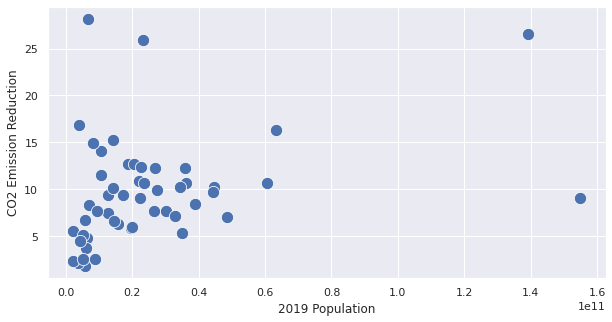

In [ ]:
plt.figure(figsize = (10,5))
ax = sns.scatterplot(y='percent_saved', x='Energy_Expenses_(USD)', data=cost_df, s=150)
plt.xlabel('2019 Population')
plt.ylabel('CO2 Emission Reduction')

In [ ]:
stats.pearsonr(cost_df['Energy_Expenses_(USD)'], cost_df['percent_saved'])

(0.3275657816316798, 0.018953819877669736)

# **Who Could Use This?**

This analysis examined several characteristics of states to determine where rooftop solar panels could have the most impact.  

**Number of panels**

For the solar panel industry, targeting areas with the most suitable rooftops would be important, as high opportunity could yield higher sales numbers.  California, Texas, Florida, New York and Ohio ranked the highest here.  It was also shown that areas with the greatest population tend to have the greatest potential for rooftop solar panels.  This relationship could be used in the future to target the best areas for sales.

**CO2 Emissions**

Environmental groups might want to pursue areas with the greatest carbon dioxide emissions, or use data on which states benefit the most in terms of CO2 abatement as incentive to implement solar panels.  Texas, California and Florida are the top CO2 emitters, while Arizona, Florida, and District of Columbia would see the most CO2 emissions reduction.

**Energy Savings**

Governments and business could use the data to launch a program supporting for more solar panel utilization, citing a reduction in costs and emissions.  Hawaii, California, and Arizona all saw their energy bill cut by at least 25%.

